Dataset: https://drive.usercontent.google.com/download?id=1VNpyNkGxHdskfdTNRSjjyNa5qC9u0JyV&export=download&authuser=0

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
trans=pd.read_csv("Fraud.csv")

In [5]:
trans.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
trans.shape

(6362620, 11)

In [7]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
trans.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


## Checking for missing values

In [9]:
trans.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


##### Observation:No missing values in the dataset

### Checking for imbalance dataset

In [10]:
trans['isFraud'].value_counts()

,count
isFraud,
0,6354407
1,8213


##### Observation: Highly imbalanced dataset

### Exploratory Data Analysis(EDA)

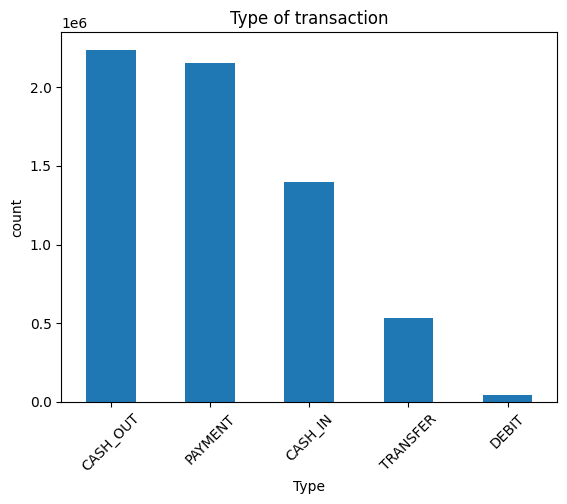

In [11]:
#Type of transaction

trans['type'].value_counts().plot(kind='bar')
plt.title('Type of transaction')
plt.xticks(rotation=45)
plt.xlabel('Type')
plt.ylabel('count')
plt.show()

#### Observation : Cash-out and payment has highest number of transaction so they are more likely for fraud

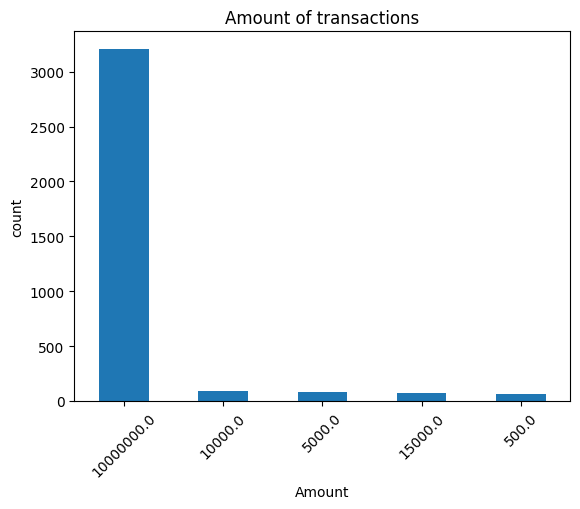

In [12]:
#Amount of transaction

trans['amount'].value_counts().head().plot(kind='bar')
plt.title('Amount of transactions')
plt.xlabel('Amount')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()

In [13]:
#Amount of transaction of each type
counts=trans.groupby('type').count()['amount']

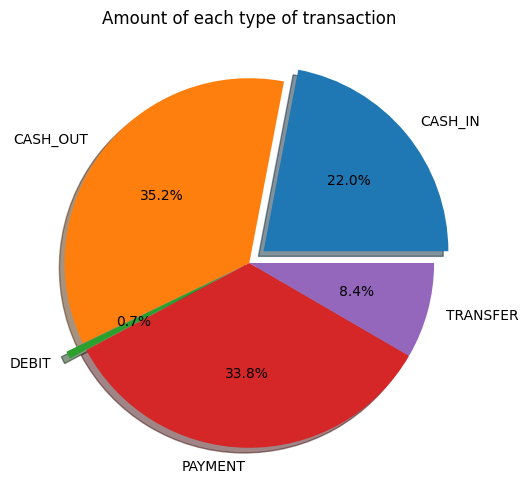

In [14]:
plt.figure(figsize=(10,6))
plt.pie(counts, labels = counts.index, autopct = "%1.1f%%",explode = (0.1, 0, 0.1, 0, 0),shadow=True)
plt.title('Amount of each type of transaction')
plt.show()

In [15]:
trans.groupby(['type','isFraud']).count()

step   amount  nameOrig  oldbalanceOrg  newbalanceOrig  \
type     isFraud                                                              
CASH_IN  0        1399284  1399284   1399284        1399284         1399284   
CASH_OUT 0        2233384  2233384   2233384        2233384         2233384   
         1           4116     4116      4116           4116            4116   
DEBIT    0          41432    41432     41432          41432           41432   
PAYMENT  0        2151495  2151495   2151495        2151495         2151495   
TRANSFER 0         528812   528812    528812         528812          528812   
         1           4097     4097      4097           4097            4097   

                  nameDest  oldbalanceDest  newbalanceDest  isFlaggedFraud  
type     isFraud                                                            
CASH_IN  0         1399284         1399284         1399284         1399284  
CASH_OUT 0         2233384         2233384         2233384         2233384  
         1            4116            4116            4116            4116  
DEBIT    0           41432           41432           41432           41432  
PAYMENT  0         2151495         2151495         2151495         2151495  
TRANSFER 0          528812          528812          528812          528812  
         1            4097            4097            4097            4097

#### Observation: Cash-Out and Transfer has fraud transactions

### Data Cleaning

In [16]:
trans.drop(columns=['nameOrig','nameDest'],axis=1,inplace=True)

In [17]:
trans.drop(columns=['isFlaggedFraud'],axis=1,inplace=True)

In [18]:
trans.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


#### Outliers

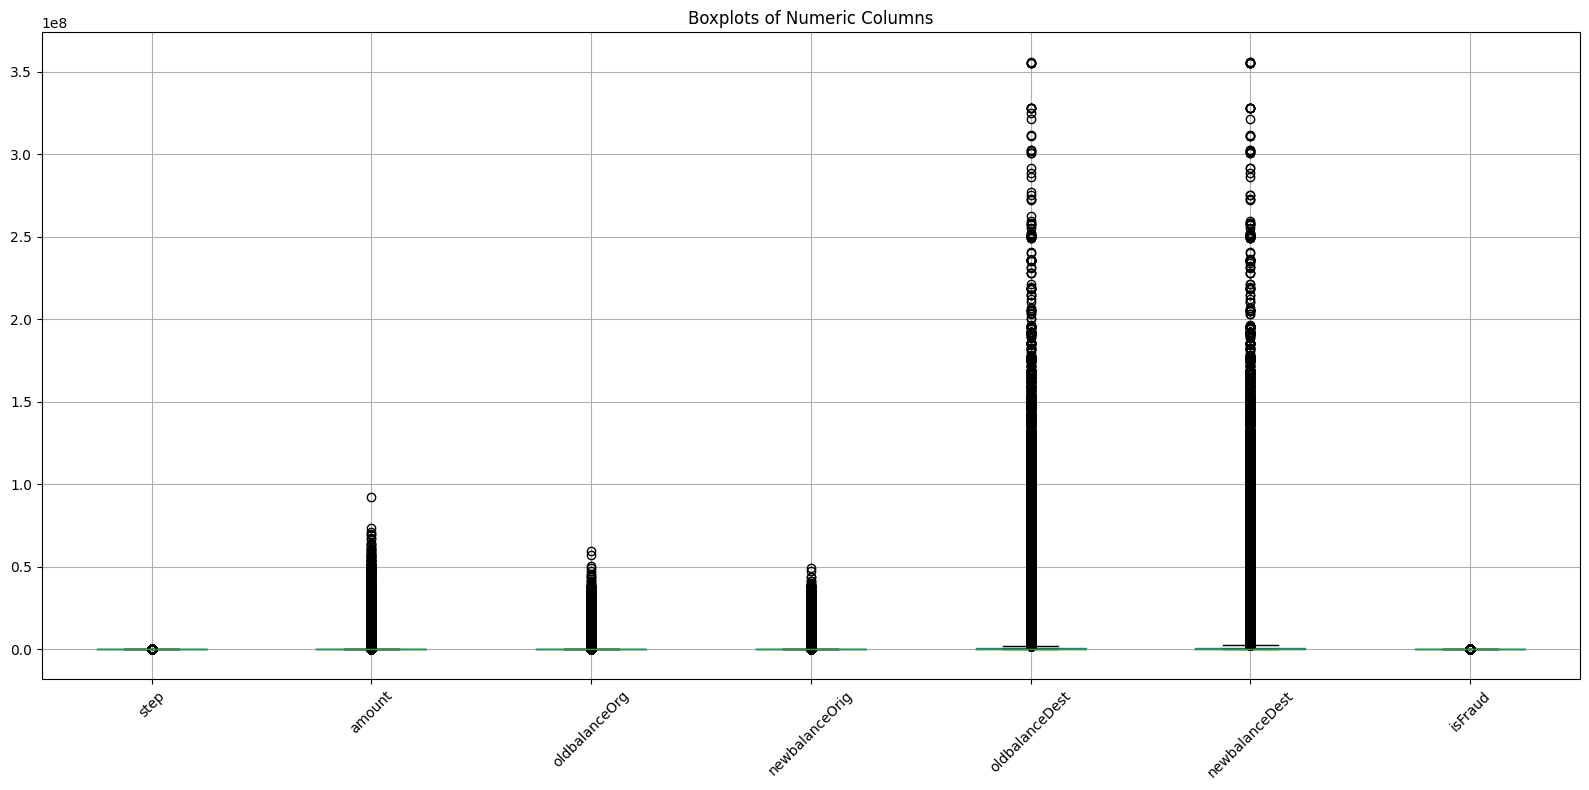

In [19]:
numeric_cols = trans.select_dtypes(include=['number']).columns

plt.figure(figsize=(16, 8))
trans[numeric_cols].boxplot(rot=45)
plt.title("Boxplots of Numeric Columns")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
Q1 = trans['amount'].quantile(0.25)
Q3 = trans['amount'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR

outliers = trans[trans['amount'] > upper_limit]
non_outliers = trans[trans['amount'] <= upper_limit]

fraud_rate_outliers = outliers['isFraud'].mean()
fraud_rate_non_outliers = non_outliers['isFraud'].mean()

print(f"Fraud Rate Among Outliers: {fraud_rate_outliers:.4f}")
print(f"Fraud Rate Among Non-Outliers: {fraud_rate_non_outliers:.4f}")


Fraud Rate Among Outliers: 0.0114
Fraud Rate Among Non-Outliers: 0.0007


#### Observation: There is more chance of fraud transaction among the oultier so we cannot blindly remove them

### Encoding the Categorical Value

In [21]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
trans['type']=le.fit_transform(trans['type'])

In [22]:
trans.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1
3,1,1,181.00,181.0,0.00,21182.0,0.0,1
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0


### Multi-Collinearity

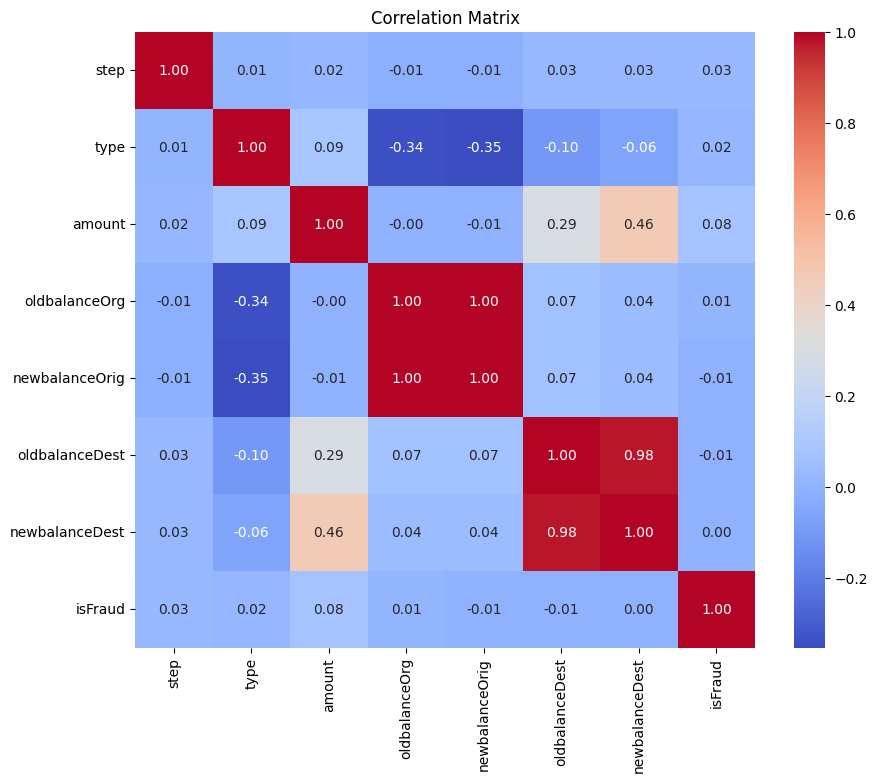

In [23]:
corr_matrix = trans.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


#### Observation:
1. The degree of association between 'oldbalanceOrg' and 'newbalanceOrig' assessed by the univariate correlation coefficient is as close to 1( 0.998 ), thereby indicating a very strong and positive linear relationship.
2. The correlation between 'amount' and 'newcomerVolumeDest' is relatively strong and the relation is positive and linear (0.459).

It is clear from the above heatmap that (oldbalanceOrg,newbalanceOrig) and	(oldbalanceDest, newbalanceDest)	are highly correlated. So, we can keep their net change as the new feature


In [24]:
trans['balance_diff_org'] =abs(trans['newbalanceOrig'] - trans['oldbalanceOrg'])
trans['balance_diff_dest'] = abs(trans['newbalanceDest'] - trans['oldbalanceDest'])

In [25]:
trans.drop(columns=['oldbalanceOrg','newbalanceOrig','oldbalanceDest', 'newbalanceDest'],axis=1, inplace=True)

In [26]:
trans.head()

,step,type,amount,isFraud,balance_diff_org,balance_diff_dest
0,1,3,9839.64,0,9839.64,0.0
1,1,3,1864.28,0,1864.28,0.0
2,1,4,181.00,1,181.00,0.0
3,1,1,181.00,1,181.00,21182.0
4,1,3,11668.14,0,11668.14,0.0


### Feature split

In [27]:
X=trans.drop('isFraud',axis=1)
y=trans['isFraud']

#### Train test split

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#### Feature Scaling

In [29]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)

Model Training-- **RandomForest**

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(class_weight='balanced',n_estimators=5, random_state=42,n_jobs=-1)
rf_classifier.fit(X_train_sc, y_train)

y_pred = rf_classifier.predict(X_test_sc)

Metrics Evaluation


Confusion Matrix:
[[1270815      89]
 [    400    1220]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.93      0.75      0.83      1620

    accuracy                           1.00   1272524
   macro avg       0.97      0.88      0.92   1272524
weighted avg       1.00      1.00      1.00   1272524



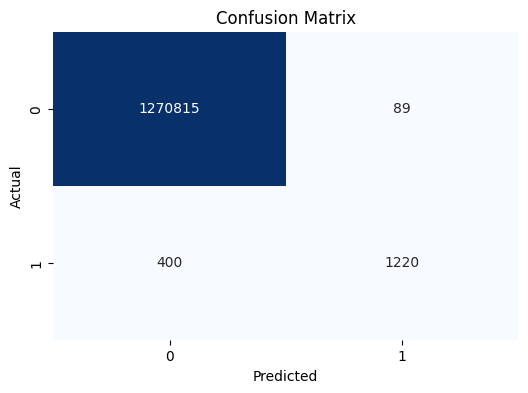

In [31]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("\nConfusion Matrix:")
print(cm)

print("\nClassification Report:")
print(cr)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Model Training-- **LightGBM**

In [32]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(class_weight='balanced', random_state=42)

model.fit(X_train_sc, y_train)
y_pred=model.predict(X_test_sc)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 6593, number of negative: 5083503
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.086374 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1026
[LightGBM] [Info] Number of data points in the train set: 5090096, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Confusion Matrix:
[[1238903   32001]
 [     45    1575]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99   1270904
           1       0.05      0.97      0.09      1620

    accuracy                           0.97   1272524
   macro avg       0.52      0.97      0.54   1272524
weighted avg       1.00      0.97      0.99   1272524



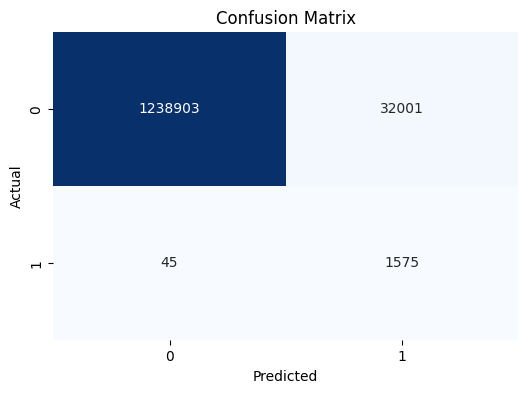

In [33]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("\nConfusion Matrix:")
print(cm)

print("\nClassification Report:")
print(cr)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Feature Importance**

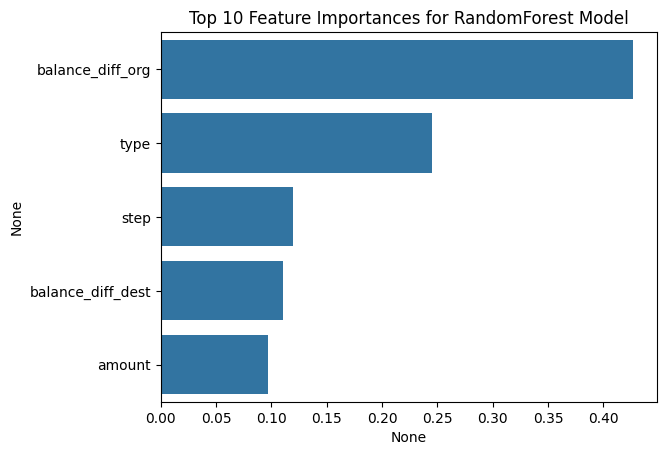

In [38]:
feature_importances = pd.Series(rf_classifier.feature_importances_, index=X_train.columns)
sns.barplot(x=feature_importances.sort_values(ascending=False)[:10],
            y=feature_importances.sort_values(ascending=False).index[:10])
plt.title("Top 10 Feature Importances for RandomForest Model")
plt.show()


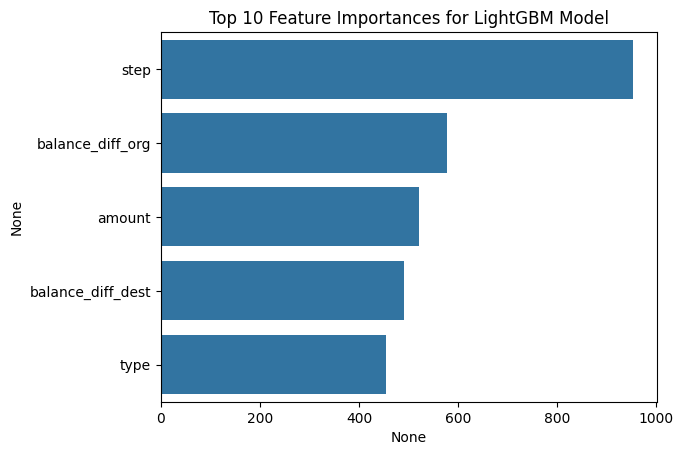

In [39]:
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
sns.barplot(x=feature_importances.sort_values(ascending=False)[:10],
            y=feature_importances.sort_values(ascending=False).index[:10])
plt.title("Top 10 Feature Importances for LightGBM Model")
plt.show()


# **Task Questions**
# 1. Data Cleaning (Missing Values, Outliers, Multi-Collinearity)
 ## Missing Values
I checked for missing values using df.isnull().sum() and turns out there is no NULL values.

## Outliers
Visualized the Outliers using the boxplot for numerical features.
Detected using IQR (Interquartile Range) for numerical features.

I didn't remove the outlier because there were more fraud transactions among outliers

## Multi-Collinearity
Checked using correlation matrix
Removed or combined highly correlated features

This helped in improving model interpretability and reducing overfitting risk.

# 2. Description of the Model
In our fraud detection framework, we trained and compared two ensemble-based models: Random Forest Classifier and LightGBM (Light Gradient Boosting Machine). The goal was to build a highly accurate and recall-sensitive model for identifying fraudulent transactions in a highly imbalanced dataset.

## Model 1: Random Forest Classifier
Why Random Forest?
Random Forest is a bagging-based ensemble method that builds multiple decision trees and combines their outputs for more stable and accurate predictions. It handles both classification and regression tasks well and is particularly robust to overfitting, especially in high-dimensional spaces.

### Performance Metrics:    
Confusion Matrix:  
[[1270815         89]       
 [   400         1220]]

### Classification Report:

Precision (Fraud class): 0.93,
Recall (Fraud class): 0.75,
F1-Score (Fraud class): 0.83,
Overall Accuracy: ~99.97%

###  Interpretation:
Very high precision (0.93) means most transactions predicted as fraud are indeed fraud.

Recall of 0.75 shows the model captures 75% of the total frauds — quite strong given class imbalance.

Very few false positives (only 89 out of 1.27 million legit transactions).
Balanced performance across both classes, making this model reliable for real-world deployment.

## Model 2: LightGBM Classifier
Why LightGBM?
LightGBM is a gradient boosting framework based on decision trees. It is known for faster training speed and higher efficiency, especially on large datasets. It also handles class imbalance using parameters like scale_pos_weight and is good at capturing subtle patterns.

### Performance Metrics:
Confusion Matrix:    
[[1238903   32001]    
 [     45    1575]]

 ### Classification Report:

Precision (Fraud class): 0.05,
Recall (Fraud class): 0.97,
F1-Score (Fraud class): 0.09,
Overall Accuracy: 97.4%

### Interpretation:
Extremely high recall (0.97) means the model is catching nearly all frauds — only 45 missed.

However, very low precision (0.05) means it's flagging many legitimate transactions as fraud (32,001 false positives).

This leads to a poor F1-score and potentially high customer dissatisfaction.

This model behaves like an aggressive detector — useful in highly risk-averse scenarios but needs post-filtering or human review.

## Conclusion:

**Random Forest** offers a balanced and reliable solution with high precision and decent recall. It's suitable for automated fraud prevention where false alarms must be minimized.

**LightGBM**, with aggressive recall, may be more suited in manual-review pipelines where capturing every fraud attempt is critical and false positives can be reviewed by humans.

Hence, based on our evaluation, it is recommended to use **Random Forest** as the primary fraud detection model, optionally supplemented by LightGBM for flagging high-risk transactions requiring further
analysis.

# Variable Selection Strategy

Steps Taken:
1. Performed EDA (Exploratory Data Analysis) to identify significant patterns.
Used feature importance from the trained model.
2. Dropped irrelevant or low-variance features.
3. Checked for multicollinearity and replaced the highly correlated features(newbalance,oldbalance) with their net change.

# Key Factors That Predict Fraudulent Customers

1. **Type:**
 Fraudulent activities tend to concentrate in specific transaction types (e.g., TRANSFER and CASH_OUT are often flagged).

 Example Insight:
TRANSFER transactions may be used to send money from one account to another fraudulently.
PAYMENT or DEBIT might rarely be fraudulent.

2. **amount:**
Fraudulent transactions often involve higher or unusual amounts.
Example Insight:
Fraudsters try to transfer large sums in a single go to avoid multiple detection chances.

3. **balance_diff_org (Change in Sender's Balance):**
Measures how much money was deducted from the original account.
A discrepancy or unusual drop (e.g., more than the transaction amount) could indicate manipulation or fraud.

4. **balance_diff_dest (Change in Recipient's Balance):**:
Indicates how much the recipient account gained.
In some fraud patterns (like CASH_OUT), the recipient may not receive expected funds or the account might be fake (zero balance update).

5. **step (Time Step in Hours):**
Fraud might be time-sensitive — for example, it might spike at night or during weekends.


# What Kind of Prevention Should Be Adopted While Updating Infrastructure?

1. **Real-Time Fraud Detection System:**
Deploy models like RandomForest or LightGBM trained on transaction patterns to flag anomalies in real-time.

2. **Transaction Monitoring Rules:**
Set dynamic rules such as:
Block transactions exceeding a typical threshold (based on user history).
Flag transfers between suspicious accounts or inactive users.
Limit night-time high-value transfers.

3. **Multi-Factor Authentication (MFA):**
Require MFA for high-risk transactions (e.g., large transfers, first-time recipients).
Use biometric or token-based verification to secure access.

4. **Customer Profiling and Behavior Analysis:**
Implement user behavior analytics (UBA):
Monitor usual login locations, times, devices.
Flag deviations (e.g., IP address change + large transfer).

5. **Role-Based Access and Encryption:**
Enforce least privilege access for internal users.
Encrypt sensitive data both in transit and at rest to prevent data leaks that aid fraud.

6. **Regular Auditing and Logging:**
Keep audit trails of every transaction, model decision, and manual override.
Ensure logs are immutable and reviewed regularly.

7. **Feedback Loop and Model Retraining:**
Regularly retrain fraud models using newly identified fraud cases.
Include human-verified feedback to reduce false positives and improve recall.


# How Would You Determine If These Actions Work?
1. **Monitor Key Fraud Metrics Over Time:**
Metrics to track:
  1. Fraud Rate (number of frauds / total transactions)
  2. False Positive Rate (legitimate flagged)
  3. Precision & Recall of the fraud detection model
  4. Customer complaints related to fraud.

    A decline in fraud rate with stable precision/recall = positive impact.      
    A drop in recall might mean more fraud is being missed despite tighter rules

2. **Pre- and Post-Implementation Comparison:**
Compare fraud incidence, transaction anomalies, and operational KPIs before and after changes using A/B testing or a time-series baseline.
  Evaluate:

  1. Reduction in fraud losses ($)
  2. Improvement in detection speed
  3. Drop in manual review workload

3. **User Experience Monitoring:**
Ensure fraud prevention doesn't hurt legitimate users:

  1. Measure MFA success rates
  2. Drop-off rate during transaction (might signal poor UX)
  3. Time to process valid transactions

4. **Feedback from Risk & Compliance Teams:**
Set up dashboards and alert systems.
Gather regular input on:

  1. Missed frauds
  2. Model misclassification
  3. Rule effectiveness